# Proyecto 06: Activación de Conceptos y Regresión Lineal

## Por Ricardo A. Del Río Guzmán

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importación de Librerías

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as smf
from os import getcwd, chdir, listdir
from scipy.stats import trim_mean as tm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


chdir('/content/drive/My Drive/__libreras_propias')
%run info_tables.ipynb
chdir('/content/drive/My Drive/Proyecto 06')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Definiciones de Clases, Funciones y Variables


In [0]:
def save_graph(name):
  org_dir = getcwd()
  chdir('/content/drive/My Drive/Proyecto 06/Imágenes')
  if not (name in listdir()):
    plt.savefig(name, bbox_inches="tight")
  chdir(org_dir)

def save_graph2(name):
  if not (name in listdir()):
    fig.savefig(name, bbox_inches="tight")

# def graph_p(hor_values, ver_values, g_type=0, 
#           hor_label='', ver_label='', title='', 
#           show_save=True, first=True, image=False):
#   options = {0: plt.plot, 1: plt.bar}
#   # Creación y configuración del gráfico:
#   if first:
#     fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
#                     edgecolor='k')
#     plt.tick_params(axis ='x', rotation = 60) 
#   options[g_type](hor_values, ver_values, color ='tomato', linewidth=3)
#   plt.xlabel(hor_label)
#   plt.ylabel(ver_label)
#   plt.title(title)
#   if image:
#     img = plt.imread("mapa-horizontal-completo.png")
#     plt.imshow(img)
#   # Se guarda el gráfico en el drive y se muestra:
#   if show_save:
#     save_graph(title.lower().replace(' ','_') + '.jpg')
    
#     plt.close() 


def analisis(db, name):
  print
  print('La base de datos "{}" tiene {} filas y {} columnas.\n'.format(name, db.shape[0], db.shape[1]))
  display(db.head(3))
  display(db.describe())
  display(db.describe().sum(axis=1))
  print('\n'+ '_'*200 + '\n')

def correlation_map(dataframe, titulo):
  corr_pd = dataframe.corr()
  # Se filtran los valores, dejando solo los con una correlación mayor al 50%
  corr_pd = corr_pd[abs(corr_pd) >= 0.05]

  plt.figure(figsize=(15, 6))
  mask = np.zeros_like(corr_pd, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  sns.heatmap(corr_pd,annot=True, mask=mask, cmap='RdBu_r')
  plt.title(titulo, fontsize=20)
  save_graph(modify_text(titulo))
  plt.show()
  print()

def char(c):
  '''
  Cambia los carácteres que no son alfanuméricos por un guión bajo.
  '''
  if c.isalnum():
    return c
  return '_'


def modify_text(text, lenght=25):
  '''
  Convierte un texto a "snake_case" con un máximo de carácteres dado.
  '''
  return ''.join(map(char, text)).lower()[:lenght+1]

In [0]:
def boxplot_graph(column, name, sec=False):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(column.values)
  plt.title('Boxplot de Columna ' + name, fontsize=20)
  if sec:
    # save_graph(modify_text('Boxplot limpio de Columna ' + name))
    pass
  else:
    # save_graph(modify_text('Boxplot de Columna ' + name))
    pass
  plt.show()


In [0]:
def null_graph(db, name):
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
  sns.heatmap(db.isnull(), cbar=False)
  plt.title('Valores Nulos en "{}"'.format(name), fontsize=20)
  save_graph(modify_text('Valores Nulos en "{}"'.format(credit.name)))
  plt.show()
  display(db.info())
  print()

In [0]:
def pretty(txt):
  return txt.replace('_',' ').title()

## Formatos y Configuraciones

In [0]:
# Carga una versión anterior de matplotlib, para que los gráficos heatmaps no
# se corten en la base:
!pip install matplotlib==3.1.0

In [0]:
# Formato de los gráficos:
sns.set(style='whitegrid')

## Carga de Datos

In [0]:
# Se define la ubicación donde se guardarán los datos de las columnas y 
# categorías:
DataBaseTable.set_dir('/content/drive/My Drive/Proyecto 06')
# Se carga la información de las columnas y categorías de cada tabla:
credit = DataBaseTable('Creditos', '/content/drive/My Drive/Proyecto 06/Credit.csv')


Nombre ingresado Creditos; nomber archivo: creditos.dinfo
entro a config columns
creditos.dinfo está en el directorio /content/drive/My Drive/Proyecto 06/__databases_info


# Repaso de Contenidos Previos

## 1) Análisis Exploratorio de Nulos

Realizar un análisis exploratorio de los datos identificando la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas.


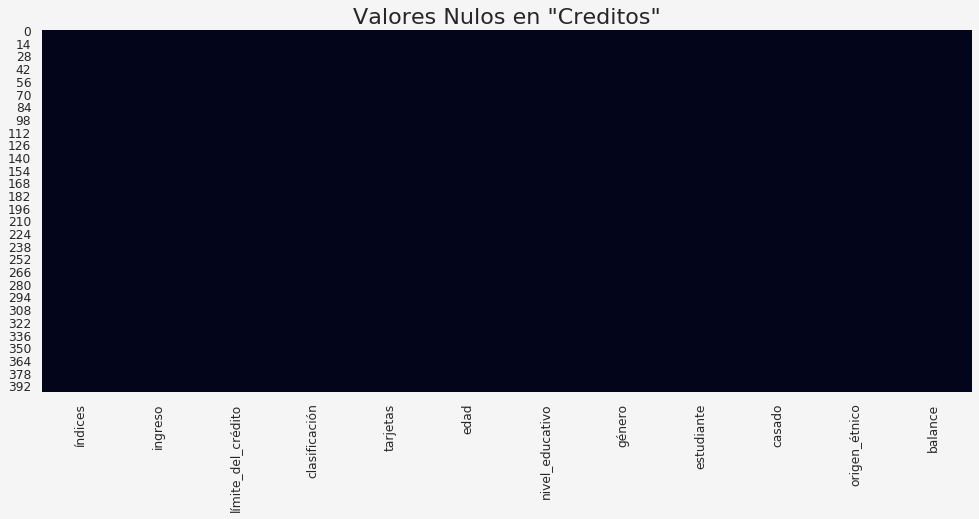

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
índices               400 non-null int64
ingreso               400 non-null float64
límite_del_crédito    400 non-null int64
clasificación         400 non-null int64
tarjetas              400 non-null int64
edad                  400 non-null int64
nivel_educativo       400 non-null int64
género                400 non-null object
estudiante            400 non-null object
casado                400 non-null object
origen_étnico         400 non-null object
balance               400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


None

In [0]:
# Se grafican y tabulan los nulos:
null_graph(credit.table, credit.name)

### Análisis y Comentarios

No hay valores nulos, por lo que no se realiza ningún tratamiento.

## *) Binarización

In [0]:
binarized = pd.get_dummies(credit.table)
binarized.columns

Index(['índices', 'ingreso', 'límite_del_crédito', 'clasificación', 'tarjetas',
       'edad', 'nivel_educativo', 'balance', 'género_ Male', 'género_Female',
       'estudiante_No', 'estudiante_Yes', 'casado_No', 'casado_Yes',
       'origen_étnico_African American', 'origen_étnico_Asian',
       'origen_étnico_Caucasian'],
      dtype='object')

In [0]:
# Se eliminan las columnas que pueden producir multicolinealidad.

try:
  binarized.drop(['género_ Male', 'estudiante_No', 'casado_No', 'origen_étnico_African American'], inplace=True, axis=1)
  print('Se eliminaron las coumnas')
except KeyError:
  print('Las columnas ya habían sido eliminadas anteriormente') 

Se eliminaron las coumnas


### Análisis y Comentarios

En la base de datos habían 102 asiáticos, 99 afro americanos y 199 caucásicos. Al binarizar se eliminó la columna de los afro americanos, ya que es el grupo con menos personas y su cantidad puede calcularse en base a las otras 2 columnas. Se  hizo para evitar una multicolinealidad. Con ek mismo objetivo y por los mismos motivos también se eliminaron todas las segundas columnas de las columnas categóricas binarias. De esta forma todas las columnas con "n" datos quedaron convertidas en "n-1" columnas de datos binarios.

## 2) Tratamiento de Outliers

Identifique y establezca un protocolo para tratar outliers.

In [0]:
def outliers_graph(column, col_name, sec = False):
  # Cut the window in 2 parts
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

  plt.title('Outliers de "{}"'.format(col_name.replace('_',' ').title()))
  
  # Add a graph in each part
  sns.boxplot(column, ax=ax_box)
  sns.distplot(column, ax=ax_hist)
  
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')

  if sec:
    save_graph(modify_text('Sin Outliers de "{}"'.format(col_name.replace('_',' ').title())))
  elif not sec:
    save_graph(modify_text('Outliers de "{}"'.format(col_name.replace('_',' ').title())))
  
  plt.show()
  print()

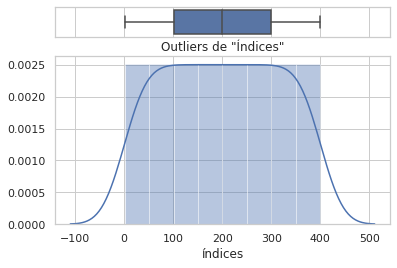

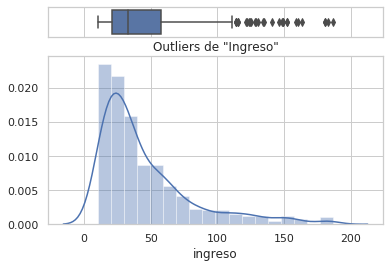

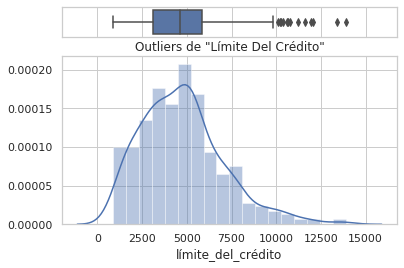

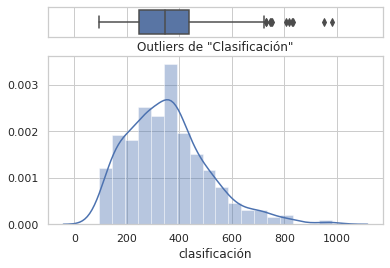

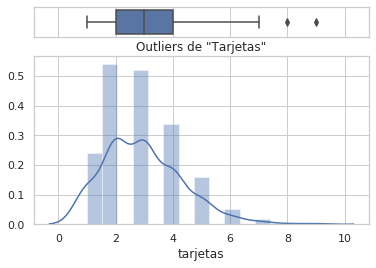

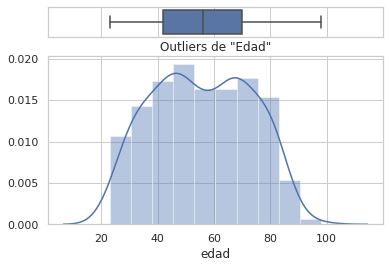

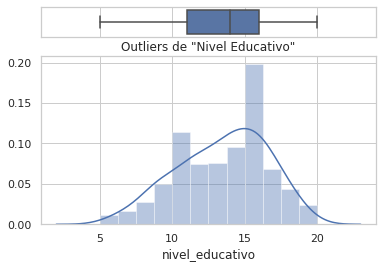

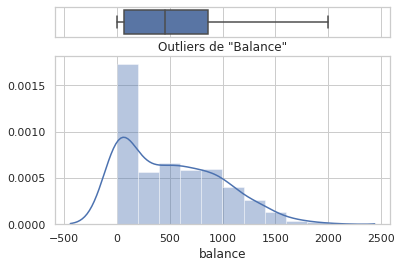

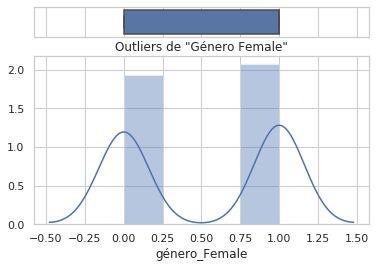

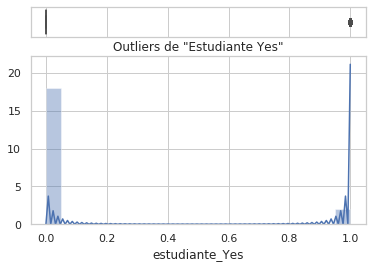

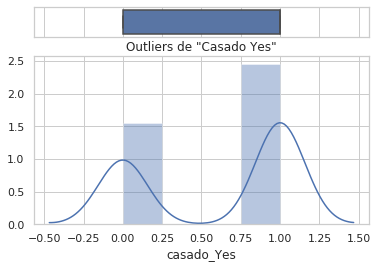

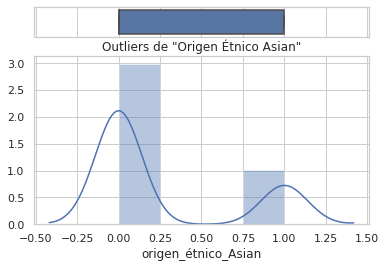

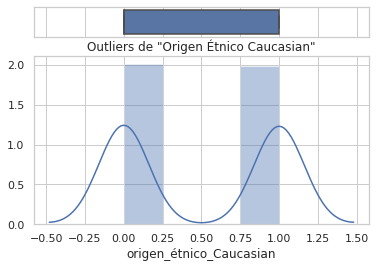

In [0]:
for col_name in binarized.columns.values:
  outliers_graph(binarized[col_name], col_name)

In [0]:
def replace_outliers(df, col_name):
  column = df.loc[:,col_name]
  # Cálculo de la media truncada:
  trim_mean = int(tm(column.values, 0.15, axis=0))

  # Array de datos repetidos para reemplazar:
  data_to_replace = np.repeat(np.c_[trim_mean, trim_mean], 9, axis=1)
  
  # Cálculo de límites:
  upper_lim = column.mean() + 3*column.std()
  lower_lim = column.mean() - 3*column.std()
  
  # Se encuentran los otliers y se reemplazan por la media de los datos truncados:
  without_ol = column\
  .where(column.gt(lower_lim),trim_mean)\
  .where(column.lt(upper_lim), trim_mean)

  # Se guarda la columna modificada en el DataFrame
  df.loc[:,col_name] = without_ol


# Se eliminan los outliers de todas las columnas con datos numéricos:
for col_name in binarized.columns.values:
  replace_outliers(binarized, col_name)

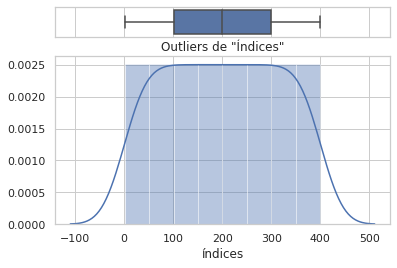

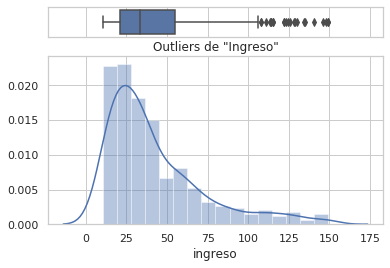

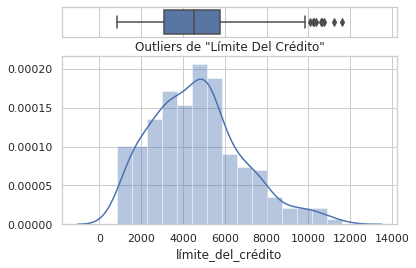

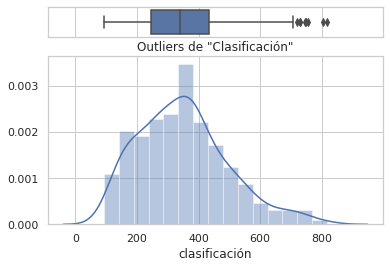

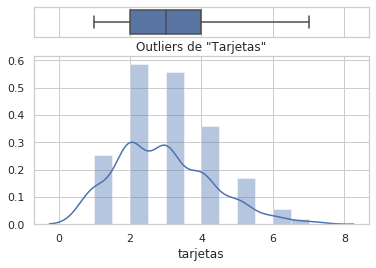

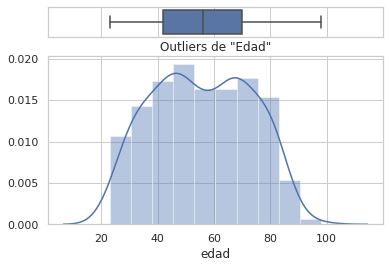

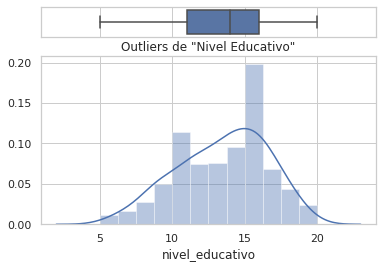

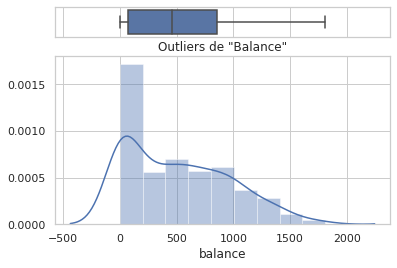

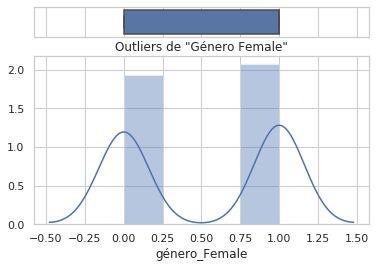

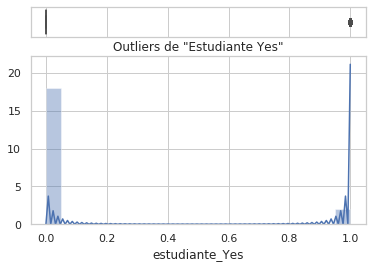

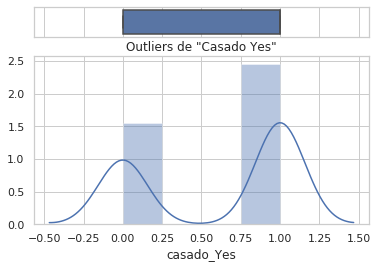

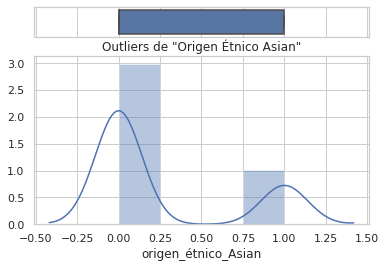

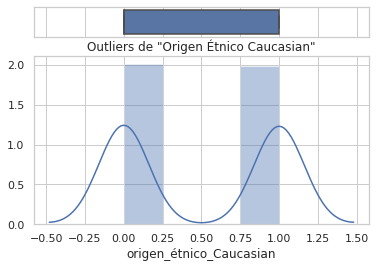

In [0]:
for col_name in binarized.columns.values:
  outliers_graph(binarized[col_name], col_name, sec = True)

### Análisis y Comentarios

Todos los datos que se alejaran de la media más de 3 veces la desviación estándar fueron reemplazados por la media de los datos truncados.

## 3) Análisis Exploratorio

Generar análisis exploratorio basándose en variables de su interés.

In [0]:
analisis(binarized, credit.name)

La base de datos "Creditos" tiene 400 filas y 13 columnas.



,índices,ingreso,límite_del_crédito,clasificación,tarjetas,edad,nivel_educativo,balance,género_Female,estudiante_Yes,casado_Yes,origen_étnico_Asian,origen_étnico_Caucasian
0,1,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,2,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,3,104.593,7075,514,4,71,11,580,0,0,0,1,0


,índices,ingreso,límite_del_crédito,clasificación,tarjetas,edad,nivel_educativo,balance,género_Female,estudiante_Yes,casado_Yes,origen_étnico_Asian,origen_étnico_Caucasian
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.00000
mean,200.500000,42.258593,4652.482500,349.362500,2.925000,55.667500,13.450000,516.180000,0.517500,0.100000,0.61250,0.255000,0.49750
std,115.614301,29.796426,2157.716945,144.600828,1.314799,17.249807,3.125207,453.749788,0.500319,0.300376,0.48779,0.436407,0.50062
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,200.500000,33.115500,4538.500000,341.000000,3.000000,56.000000,14.000000,459.500000,1.000000,0.000000,1.00000,0.000000,0.00000
75%,300.250000,55.054500,5782.500000,433.000000,4.000000,70.000000,16.000000,857.750000,1.000000,0.000000,1.00000,1.000000,1.00000
max,400.000000,149.316000,11589.000000,817.000000,7.000000,98.000000,20.000000,1809.000000,1.000000,1.000000,1.00000,1.000000,1.00000


count     5200.000000
mean      5834.808593
std       2925.393612
min        988.354000
25%       3580.507250
50%       5647.615500
75%       7522.554500
max      14894.316000
dtype: float64


________________________________________________________________________________________________________________________________________________________________________________________________________



## 4) Análisis de Correlación

Generar análisis de correlación. Generar Matriz y scatterplots.

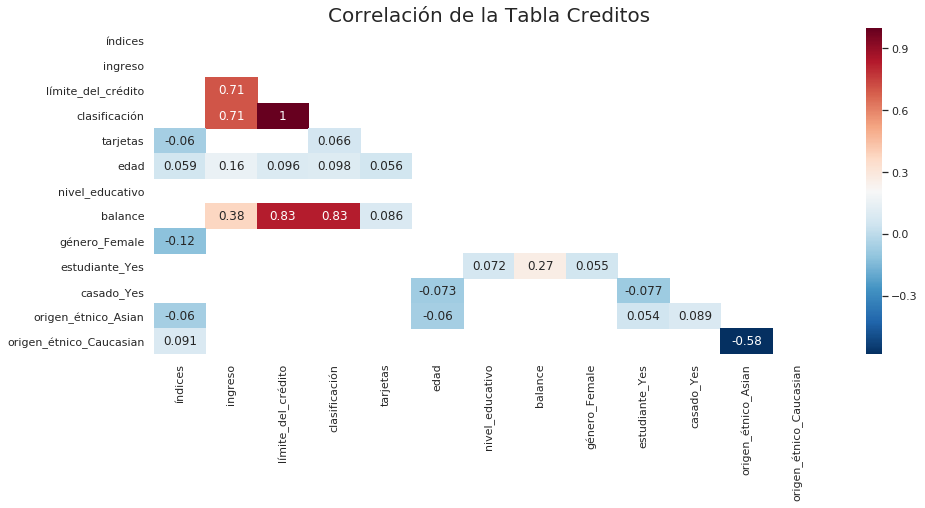

In [0]:
correlation_map(binarized, f'Correlación de la Tabla {credit.name}')

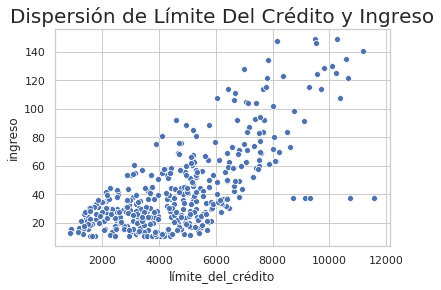

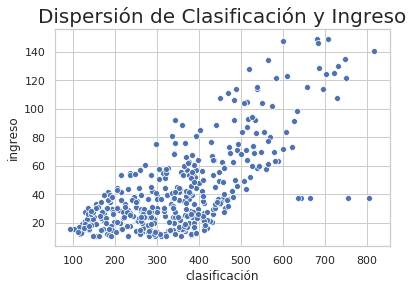

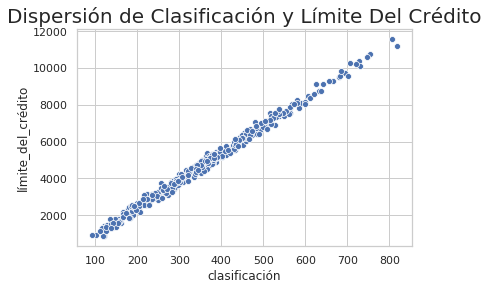

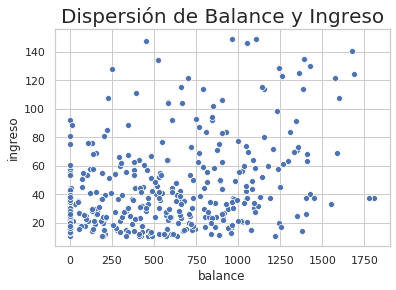

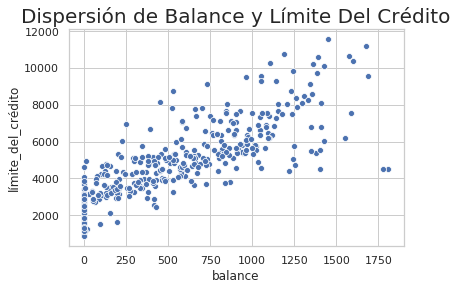

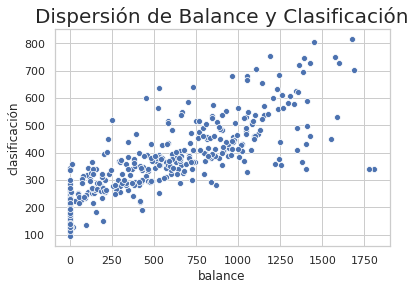

In [0]:
correlation_tuples = [('límite_del_crédito', 'ingreso'),
                      ('clasificación','ingreso'),
                      ('clasificación','límite_del_crédito'),
                      ('balance', 'ingreso'),
                      ('balance','límite_del_crédito'),
                      ('balance','clasificación')]

for tup in correlation_tuples:
  sns.scatterplot(x=tup[0], y=tup[1], data=binarized, markers='.')
  plt.title('Dispersión de {} y {}'.format(pretty(tup[0]), pretty(tup[1])), fontsize=20)
  save_graph(modify_text('Dispersión de {} y {}'.format(pretty(tup[0]), pretty(tup[1]))))
  plt.show()
  print()

### Análisis y Comentarios

Se aprecia una alta correlación entre las columnas:
- límite_del_crédito e ingreso
- clasificación e ingreso
- clasificación y límite_del_crédito
- balance y límite_del_crédito
- balance y clasificación

Al hacer los gráficos de dispersión con las columnas con mayor correlación se puede observar los los datos se encuentran bastante cercanos entre sí. Y se fáctible el trazado de una línea que pase por una gran cantidad de esos puntos.

## 5) Función para Graficar Frecuencias, Media y Mediana

Generar una función que dibuje un histograma y que además identifique de manera visual la media y mediana. Esta función debe ser aplicada para las variables ‘Balance’, ‘Income’, ‘Rating’ y ‘cards’. Según los gráficos generados, como es el comportamiento de estas variables.


In [0]:
def descriptive_measures(column):
  dm = {'median' : [column.median(), '#E69201'],
       'mode' : [column.mode().to_list()],
       'mean' : [column.mean(), 'r']}

  dm2={'std_desv' : column.std(),
      'variance' : column.var()}

  print(f'MEDIDAS DE TENDENCIA CENTRAL:\n\tMedia Aritmética: {dm["mean"][0]}\n\t'\
        f'Moda: {dm["mode"][0]}\n\tMediana: {dm["median"][0]}\n\nMEDIDAS DE DISPERSIÓN\n\t'\
        f'Desviación Estándar: {dm2["std_desv"]}\n\tVarianza: {dm2["variance"]}'\
        '\n\nEn el gráfico la media es roja y la mediana naranja\n')
  
  return dm

def graph_dm(data, col_name):  

  print(f'Trabajando con la columna: {col_name}\n')
  data[col_name].hist()
  plt.title(col_name, fontsize=20)
  dic = descriptive_measures(data[col_name])
  
  for measure in list(dic.keys())[0:3:2]:
    plt.axvline(x=dic[measure][0], linewidth=4, color=dic[measure][1])
  
  save_graph(modify_text('{} frec moda y mediana'.format(col_name)))

  plt.show()

  

  print('\n'+ '_'*200 + '\n')


Trabajando con la columna: índices

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 200.5
	Moda: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,

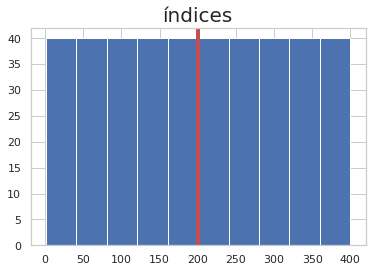


________________________________________________________________________________________________________________________________________________________________________________________________________

Trabajando con la columna: ingreso

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 45.218885000000036
	Moda: [23.793000000000003]
	Mediana: 33.1155

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 35.24427316507052
	Varianza: 1242.1587909341097

En el gráfico la media es roja y la mediana naranja



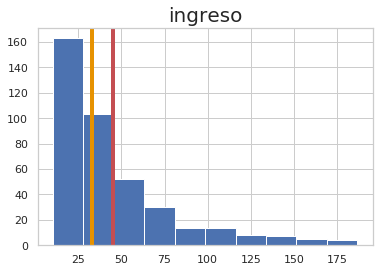


________________________________________________________________________________________________________________________________________________________________________________________________________

Trabajando con la columna: límite_del_crédito

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 4735.6
	Moda: [855, 2120, 2525, 2860, 3388, 3461, 3907, 4391, 5140, 5673, 6386, 6662, 6819]
	Mediana: 4622.5

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 2308.1988475431426
	Varianza: 5327781.919799492

En el gráfico la media es roja y la mediana naranja



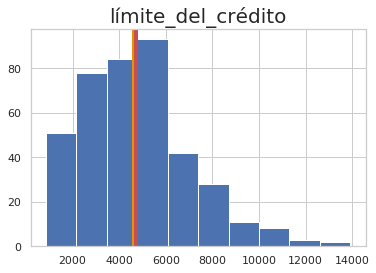


________________________________________________________________________________________________________________________________________________________________________________________________________

Trabajando con la columna: clasificación

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 354.94
	Moda: [344]
	Mediana: 344.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 154.72414259174906
	Varianza: 23939.560300751895

En el gráfico la media es roja y la mediana naranja



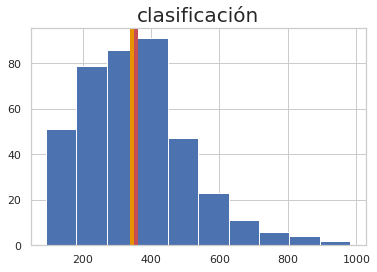


________________________________________________________________________________________________________________________________________________________________________________________________________

Trabajando con la columna: tarjetas

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 2.9575
	Moda: [2]
	Mediana: 3.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 1.371274858240354
	Varianza: 1.8803947368421028

En el gráfico la media es roja y la mediana naranja



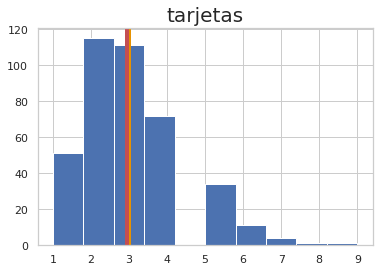


________________________________________________________________________________________________________________________________________________________________________________________________________

Trabajando con la columna: edad

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 55.6675
	Moda: [44, 66]
	Mediana: 56.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 17.24980676220268
	Varianza: 297.55583333333334

En el gráfico la media es roja y la mediana naranja



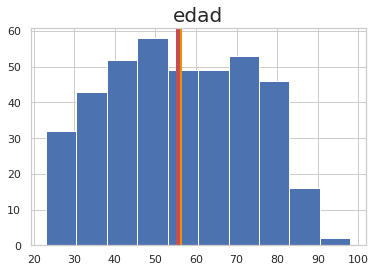


________________________________________________________________________________________________________________________________________________________________________________________________________

Trabajando con la columna: nivel_educativo

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 13.45
	Moda: [16]
	Mediana: 14.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 3.1252067600773334
	Varianza: 9.766917293233064

En el gráfico la media es roja y la mediana naranja



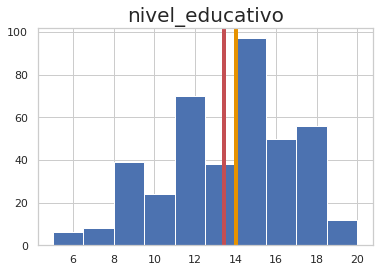


________________________________________________________________________________________________________________________________________________________________________________________________________

Trabajando con la columna: balance

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 520.015
	Moda: [0]
	Mediana: 459.5

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 459.75887738938343
	Varianza: 211378.22533834612

En el gráfico la media es roja y la mediana naranja



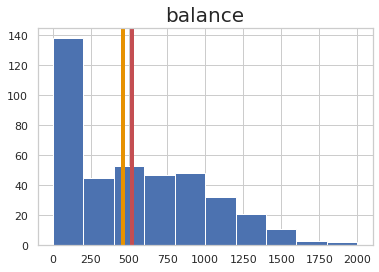


________________________________________________________________________________________________________________________________________________________________________________________________________



In [0]:
for col_name in map(lambda col: col.name, filter(lambda col: col.coltype in ['NUM_DIS','NUM_CON'], credit.columns)):
  graph_dm(credit.table, col_name)

# Regresión Lineal

## 6) Regresiones Lineales Simples

Generar 3 regresiones lineales simple (1 variable independiente) para ‘Student’, ‘Income’, ‘Rating’. Identificar coeficientes de la recta y ver cuales de estas tres tiene una explica de mejor forma el fenómeno.

Nuevo enunciado:

Generar 3 regresiones lineales simple para la variable “Balance” (variable dependiente) utilizando como variables independientes  ‘Student’, ‘Income’, ‘Rating’ respectivamente (una para cada regresión). Identificar coeficientes de la recta y ver cuales de estas tres explica de mejor forma el fenómeno.

In [0]:
def simple_lin_reg(hor_values, ver_values, col_name):
  X = hor_values.reshape(-1,1)
  Y = ver_values.reshape(-1,1)
  linear_regressor = LinearRegression()  # Se crea el objeto de las regresiones
  linear_regressor.fit(X, Y)  # Realiza la regresión lineal
  Y_pred = linear_regressor.predict(X)  # Predicciones

  # Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
  print('Coeficiente (Pendiente):                         ', *linear_regressor.coef_)
  # Este es el valor donde corta el eje Y (en X=0)
  print('Término Independiente (Coeficiente de Posición): ', *linear_regressor.intercept_)
  # Error Cuadrado Medio
  print("Error Cuadrático Medio:                           %.2f" % mean_squared_error(Y, Y_pred))
  # Puntaje de Varianza. El mejor puntaje es un 1.0
  print('Puntaje de Varianza:                              %.2f' % r2_score(Y, Y_pred)) 
  # Precisión del Modelo:
  print('Precisión del Modelo:                             {}'.format(linear_regressor.score(X,Y))) # R cuadrado. Precición del modelo. (Parece que es equivalente al de arriba)
  print()

  # Gráfico de la regresión:
  fig = plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.scatter(X, Y)
  plt.plot(X, Y_pred, color='red')

  plt.title(f'Regresión Lineal {col_name.replace("_"," ").title()}', fontsize=20)
  save_graph(modify_text(f'Regresión Lineal {col_name}'))
  
  plt.show()

  print('\n'+ '_'*200 + '\n')


Coeficiente (Pendiente):                          [5.72384839]
Término Independiente (Coeficiente de Posición):  274.29822327640215
Error Cuadrático Medio:                           176359.49
Puntaje de Varianza:                              0.14
Precisión del Modelo:                             0.14127708040690234



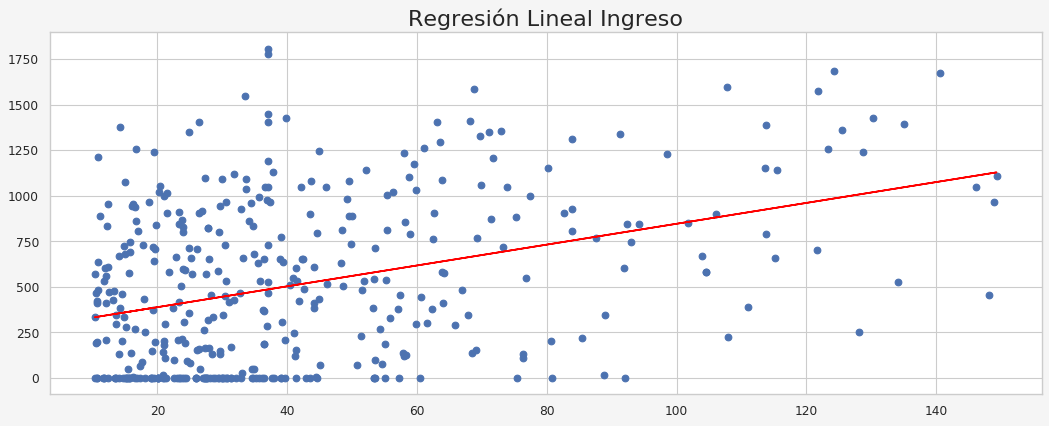


________________________________________________________________________________________________________________________________________________________________________________________________________

Coeficiente (Pendiente):                          [2.60612318]
Término Independiente (Coeficiente de Posición):  -394.3017089517374
Error Cuadrático Medio:                           63715.09
Puntaje de Varianza:                              0.69
Precisión del Modelo:                             0.6897608971941007



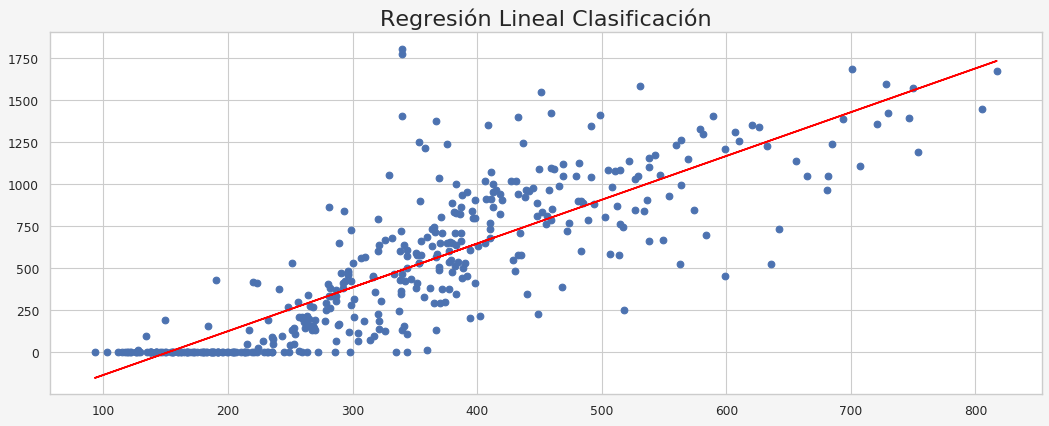


________________________________________________________________________________________________________________________________________________________________________________________________________

Coeficiente (Pendiente):                          [400.71666667]
Término Independiente (Coeficiente de Posición):  476.10833333333323
Error Cuadrático Medio:                           190922.50
Puntaje de Varianza:                              0.07
Precisión del Modelo:                             0.07036740696860733



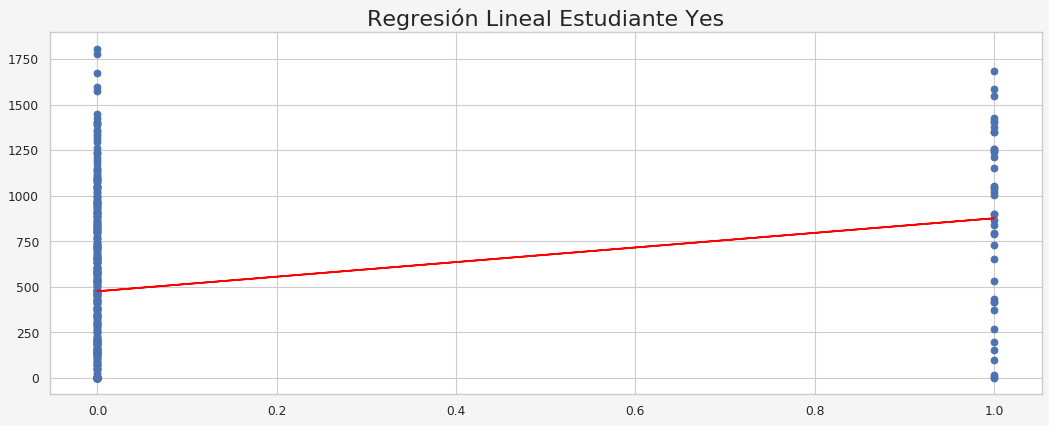


________________________________________________________________________________________________________________________________________________________________________________________________________



In [0]:
# Se calcula cada una de las regresiones lineales solicitadas:
cols_names = ['ingreso', 'clasificación', 'estudiante_Yes']
for name in cols_names:
  simple_lin_reg(binarized[name].values, binarized.balance.values, name)


### Análisis y Comentarios

En la regresión lineal de los datos de la clasificaición con respecto al balance es dónde mejor se puede apreciar el fenómeno, pues todos los puntos generados se encuentran muy cercanos al segmento de recta generado en toda su extensión.

## 7) Regresión Lineal con Todos los Regresores

Genere una nueva regresión lineal utilizando todos los regresores (todas las columnas). Indique cuales son sus coeficientes. ¿Cual es el que más repercute en el modelo?

In [0]:
# Regresion lineal multiple (Forma 1):

X = binarized.drop('balance', inplace=False, axis=1)
Y = binarized['balance']
linear_regressor = LinearRegression()  # Se crea el objeto de las regresiones
linear_regressor.fit(X, Y)  # Realiza la regresión lineal
Y_pred = linear_regressor.predict(X)  # Predicciones

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficiente (Pendiente):                         ', linear_regressor.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término Independiente (Coeficiente de Posición): ', linear_regressor.intercept_)
# Error Cuadrado Medio
print("Error Cuadrático Medio:                           %.2f" % mean_squared_error(Y, Y_pred))
# # Puntaje de Varianza. El mejor puntaje es un 1.0
# print('Puntaje de Varianza:                              %.2f' % r2_score(Y, Y_pred)) 
# Precisión del Modelo:
print('Precisión del Modelo:                             {}'.format(linear_regressor.score(X,Y))) # R cuadrado. Precición del modelo. (Parece que es equivalente al de arriba)
print()

Coeficiente (Pendiente):                          [-1.93467322e-02 -6.35631435e+00  1.92166469e-01  6.66905637e-01
  2.45487743e+01 -1.52127149e+00 -2.68384262e+00  3.49043680e+00
  3.97676115e+02 -5.05417248e+00 -2.20061899e+00 -1.66751246e+01]
Término Independiente (Coeficiente de Posición):  -319.0183371222397
Error Cuadrático Medio:                           29886.95
Precisión del Modelo:                             0.8544756114628118



In [0]:
# Regresion lineal multiple (Forma 2):

x = binarized.drop('balance', inplace=False, axis=1)
y = binarized['balance']
X = smf.add_constant(x)
est = smf.OLS(y, x).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                balance   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              448.5
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                   6.40e-219
Time:                        15:19:21   Log-Likelihood:                         -2640.6
No. Observations:                 400   AIC:                                      5305.
Df Residuals:                     388   BIC:                                      5353.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Análisis y Comentarios

Los regresores que más influyen en el modelo coinciden con aquellos que tienen sus valores marcadamente positivos o marcadamente negativos, que tienen una desviación estándar más baja y que tienen una mayor correlación lineal con la variable dependiente.

En este caso son: límite del crédito, clasificación, balance y estudiante.

## 8) Comportamiento de los 3 Principales Determinantes 

Utilizando `lmplot` de `seaborn`, inspeccione el comportamiento de los tres principales determinantes. ¿Qué comportamiento observa?.

In [0]:
sns.set(color_codes=True)

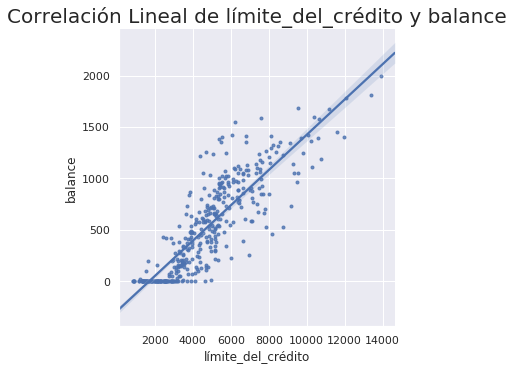

In [0]:
# 1) Límite del Crédito:
sns.lmplot(x="límite_del_crédito", y="balance", data=credit.table, markers='.')
plt.title('Correlación Lineal de límite_del_crédito y balance', fontsize=20)
save_graph('Correlación Lineal de límite_del_crédito y balance')

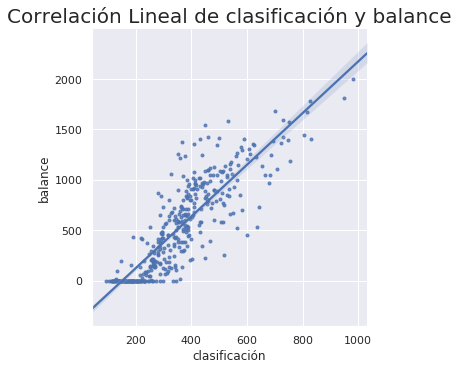

In [0]:
# Clasificación:
sns.lmplot(x="clasificación", y="balance", data=credit.table, markers='.')
plt.title('Correlación Lineal de clasificación y balance', fontsize=20)
save_graph('Correlación Lineal de clasificación y balance')

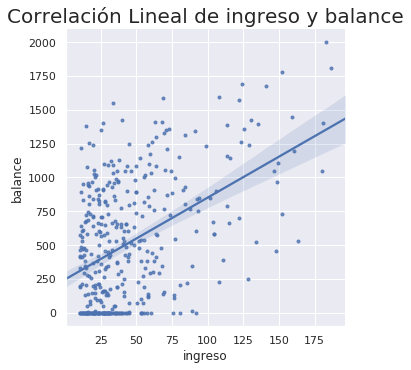

In [0]:
# 3) Ingreso:
sns.lmplot(x="ingreso", y="balance", data=credit.table, markers='.')
plt.title('Correlación Lineal de ingreso y balance', fontsize=20)
save_graph('Correlación Lineal de ingreso y balance')

### Análisis y Comentarios

Se aprecia que los datos de los 3 principales determinantes tienen una alta correlación lineal con la variable dependiente. Por lo tanto, todos los puntos de la dispersión se encuentran muy cercanos a la recta que representa la regresión lineal.

# Bonus

## 9) Depuración del Modelo

Depure el modelo utilizando solo los regresores más significativos (pvalues =< 0.025) Genere un nuevo modelo con solo estos regresores. ¿Qué diferencias encuentra con respecto al modelo de la pregunta 7.?

In [0]:
x = binarized.drop(['índices','balance', 'edad', 'nivel_educativo', 'tarjetas'], inplace=False, axis=1)
y = binarized['balance']
X = smf.add_constant(x)
est = smf.OLS(y, x).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                balance   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              529.6
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                   7.10e-205
Time:                        15:19:24   Log-Likelihood:                         -2686.7
No. Observations:                 400   AIC:                                      5389.
Df Residuals:                     392   BIC:                                      5421.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Análisis y Comentarios

Para depurar el modelo se mantuvieron aquellos regresores que más le repercuten y lo determinan. Se eliminaron además aquellos regresores con una alta correlación con otras variables independientes, para evitar problemas de multicolinealidad y sobrerepresentación de los datos, que le quitan precisión al modelo.

# Formato de Entrega


Notebook formato informe. Esto quiere decir:
Ordenado por preguntas. 
Que corra de principio a fin. Si este presenta error, se corregirá hasta antes del error.
Código bien documentado. Esto hace referencia a que deben contestar las preguntas en el notebook. Además, incluir sus conclusiones si la pregunta así lo requiere.
Diapositivas de presentación (formato pdf). 

Plazos de entrega:

**Entregar notebook y diapositivas Jueves 21/11/2019 hasta las 23:59 hrs.**

**Presentación Viernes 22/11/2019 desde las 09:00 hrs.**